In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from datetime import datetime
from pathlib import Path
from notebooks.utils import  *
import networkx as nx
import matplotlib.pyplot as plt
from causallearn.search.ConstraintBased.PC import pc


In [2]:
project_root = get_git_root()
data_folder = "data"
datafile = "features.csv"
figsize = (10, 8)
font_graph = 10
font_color_graph = "black"

In [3]:
df = pd.read_csv(Path(project_root, data_folder, datafile))
# remove the ones for which even date is na
df = df.dropna(subset="day_survey")

In [4]:
num_prior_days = 10
date_covid = datetime(2020, 3, 1)
# rough date
date_vaccine = datetime(2021, 4, 1)

ema_dictionary = {
    "Y1": "pam",
    "Y2": "phq2_score",
    "Y3": "phq4_score",
    "Y4": "gad2_score",
    "Y5": "social_level",
    "Y6": "sse_score",
    "Y7": "stress",
}
reverse_ema_dictionary = {v: k for k, v in ema_dictionary.items()}

physical_dictionary = {
    "P1": "excercise",
    "P2": "studying",
    "P3": "in house",
    "P4": "sports",
}
social_dictionary = {
    "S1": "traveling",
    "S2": "distance traveled",
    "S3": "time in social location",
    "S4": "visits",
    "S5": "duration unlocked phone in social locations",
    "S6": "frequency of unlocked phone in social locations",
    "S7": "motion at social locations",
}

sleep_dictionary = {
    "Z1": "sleep_duration",
    "Z2": "sleep start time",
    "Z3": "sleep end time",
}

full_dictionary = (
    physical_dictionary | social_dictionary | sleep_dictionary | ema_dictionary
)


ema = [f"Y{i}" for i in range(1, 8, 1)]
physical = [f"P{i}" for i in range(1, 5, 1)]
social = [f"S{i}" for i in range(1, 8, 1)]
sleep = [f"Z{i}" for i in range(1, 4, 1)]

In [5]:
df["date"] = pd.to_datetime(df["day_survey"])
df.rename(columns=reverse_ema_dictionary, inplace=True)
df.set_index(["uid", "date"], inplace=True)
df.dropna(subset=ema + physical + social + sleep, inplace=True)

In [6]:
outcomes = ["Y4"]
features = social
subset = outcomes + features
draw_dictionary = {
    k: v for k, v in full_dictionary.items() if k in (outcomes + features)
}
df = df[subset]

In [7]:
draw_dictionary

{'S1': 'traveling',
 'S2': 'distance traveled',
 'S3': 'time in social location',
 'S4': 'visits',
 'S5': 'duration unlocked phone in social locations',
 'S6': 'frequency of unlocked phone in social locations',
 'S7': 'motion at social locations',
 'Y4': 'gad2_score'}

In [8]:
check_all_float(df, subset)

In [27]:
cg = pc(np.vstack(df.to_numpy()))
node_labels = {i: col for i, col in enumerate(df.columns)}
# Update node labels in the causal graph
for index, node in enumerate(cg.G.nodes):
    node_name = node_labels[index]
    cg.G.nodes[index]["label"] = node_name

['traveling',
 'distance traveled',
 'time in social location',
 'visits',
 'duration unlocked phone in social locations',
 'frequency of unlocked phone in social locations',
 'motion at social locations',
 'gad2_score']

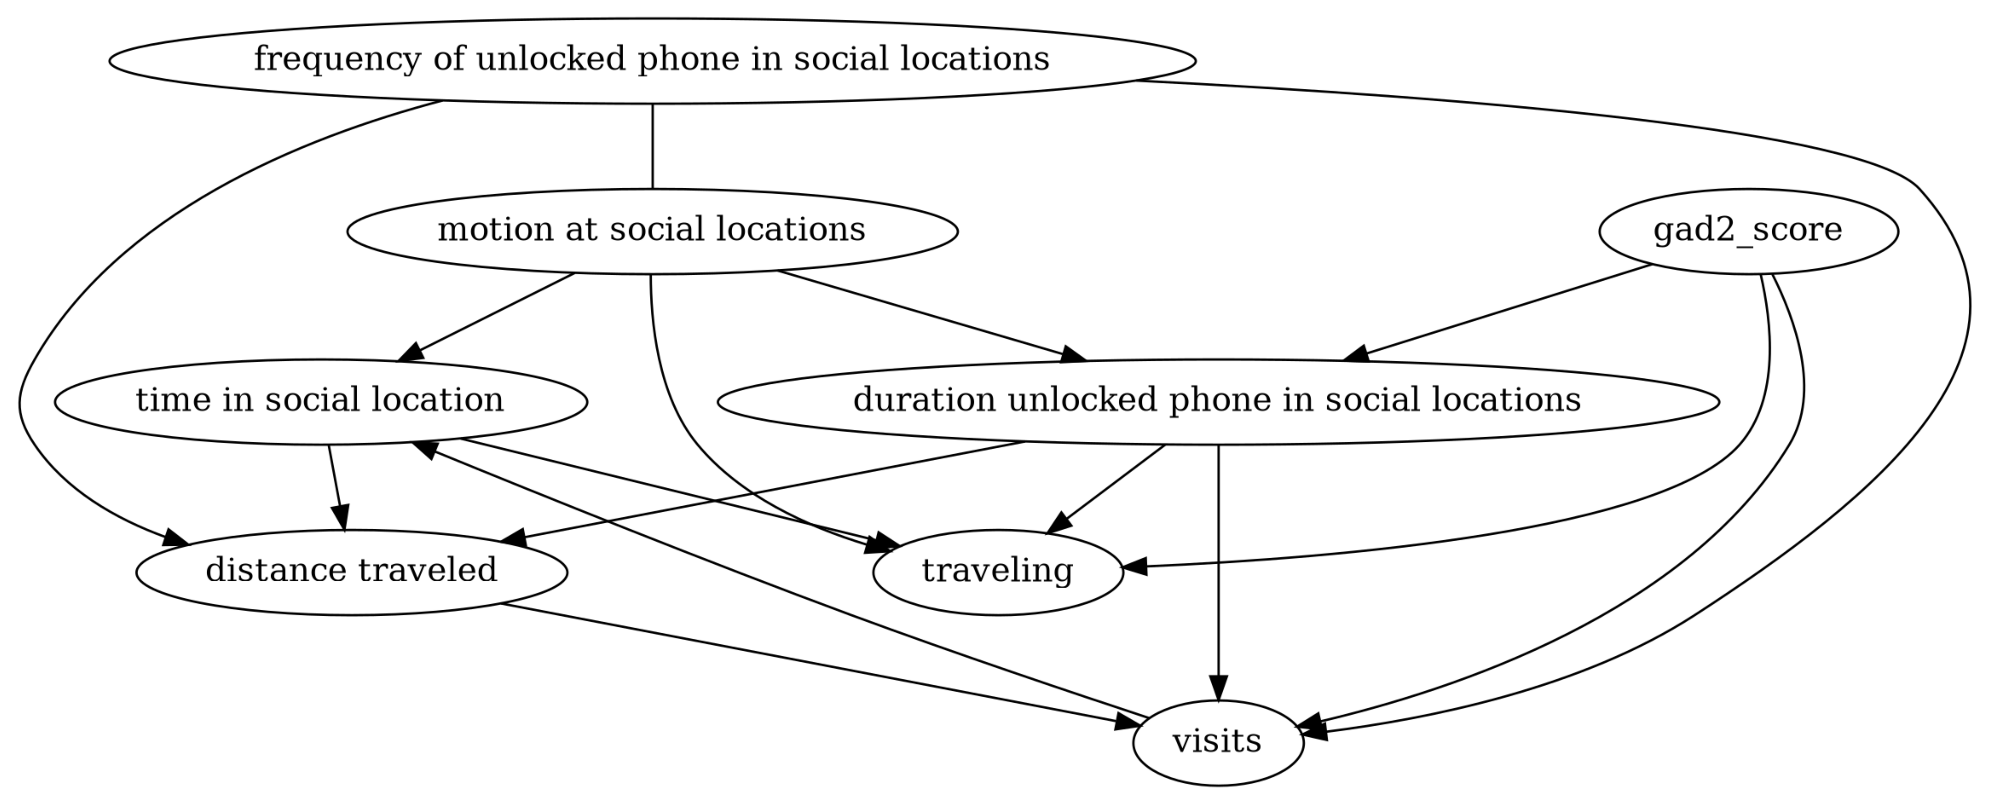

In [36]:
# Plot the graph using pydot with updated labels
cg.draw_pydot_graph(labels=list(draw_dictionary.values()))

In [37]:
type(result)

NoneType

In [38]:
cg